# Market Analyst Agent - Notebook

This notebook is for running and testing individual agents before wiring them into the API.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load env vars from .env
import os
from pathlib import Path
from dotenv import load_dotenv

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
load_dotenv(root / '.env')

# Optional: sanity check for required envs
required = [
    'AZURE_OPENAI_ENDPOINT',
    'AZURE_OPENAI_KEY',
    'AZURE_OPENAI_DEPLOYMENT',
    'TAVILY_API_KEY',
]
missing = [k for k in required if not os.getenv(k)]
if missing:
    print('Missing env vars:', missing)
else:
    print('All required env vars present')


All required env vars present


In [3]:
# Import and build the web search agent
import sys
from pathlib import Path
from langchain.messages import HumanMessage

root = Path.cwd().parent if (Path.cwd() / 'backend').exists() is False else Path.cwd()
sys.path.append(str(root / 'backend'))

from app.agents.news.web_search_agent import build_web_search_agent

agent = build_web_search_agent()
print('Agent ready')


c:\Users\rushi\miniconda3\envs\aiproject\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch was not found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Agent ready


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\news\web_search_agent.py:46: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  TavilySearchResults(max_results=5),


In [4]:
# Run a query
query = 'latest quarterly earnings for NVIDIA'
result = agent.invoke({'messages': [HumanMessage(content=query)]})
result


{'messages': [HumanMessage(content='latest quarterly earnings for NVIDIA', additional_kwargs={}, response_metadata={}, id='24722668-ed3c-4c6f-be32-344126a1c1e0'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 191, 'total_tokens': 228, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.2-2025-12-11', 'system_fingerprint': None, 'id': 'chatcmpl-DEHtkgbQDZeLriqkE5YO5uN4kgG7y', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'sa

In [5]:
print(result['messages'][-1].content  )

NVIDIA’s **latest reported quarter** is **fiscal Q4 2026 (quarter ended Jan. 25, 2026)**, reported **Nov. 19, 2025**.

- **Revenue:** **$68.1B** (up **20% QoQ**, **73% YoY**)  
- **GAAP EPS (diluted):** **$1.76**  
- **Non-GAAP EPS (diluted):** **$1.62**  
- **GAAP gross margin:** **75.0%** (non-GAAP **75.2%**)  
- **Data Center revenue:** **$62.3B** (per CNBC coverage)

**Sources:** NVIDIA Investor Relations earnings release (Financial Reports) https://investor.nvidia.com/financial-info/financial-reports/ ; CNBC recap https://www.cnbc.com/2026/02/25/nvidia-nvda-earnings-report-q4-2026.html


## Technical Analysis Agent


In [6]:
# Import and run technical chart agent
from app.agents.technical.technical_chart_agent import analyze_stock_technical

result = analyze_stock_technical('AAPL')
result


TechnicalAnalysisResult(symbol='AAPL', image_path='data\\processed\\AAPL_technical.png', summary='- **Trend (price action):** Downtrend from late Nov into mid‑Jan (lower highs/lows), followed by a sharp rebound into early Feb. Since then, **choppy consolidation** with lower highs around the **275–280** area and support near **255–260**.\n- **Momentum (MACD):** MACD turned up strongly in late Jan/early Feb (bullish momentum expansion), then **momentum faded** as the histogram rolled over and compressed toward zero. Latest bars show **only mild positive/neutral momentum**.\n- **Notable crossovers (MACD):** A **bullish MACD crossover** occurred in late Jan/early Feb. More recently, MACD and signal have **converged near the zero line** (no strong fresh crossover; momentum is indecisive).\n- **RSI (overbought/oversold):** RSI stayed mostly **below/around 50** during the decline, then recovered to the **50–60** zone on the rebound. It **did not reach overbought (>70)** and is currently **nea

In [7]:
print(result.summary)

- **Trend (price action):** Downtrend from late Nov into mid‑Jan (lower highs/lows), followed by a sharp rebound into early Feb. Since then, **choppy consolidation** with lower highs around the **275–280** area and support near **255–260**.
- **Momentum (MACD):** MACD turned up strongly in late Jan/early Feb (bullish momentum expansion), then **momentum faded** as the histogram rolled over and compressed toward zero. Latest bars show **only mild positive/neutral momentum**.
- **Notable crossovers (MACD):** A **bullish MACD crossover** occurred in late Jan/early Feb. More recently, MACD and signal have **converged near the zero line** (no strong fresh crossover; momentum is indecisive).
- **RSI (overbought/oversold):** RSI stayed mostly **below/around 50** during the decline, then recovered to the **50–60** zone on the rebound. It **did not reach overbought (>70)** and is currently **near ~50**, suggesting neutral momentum (no oversold <30 either).
- **Near-term signals:** With **RSI ~5

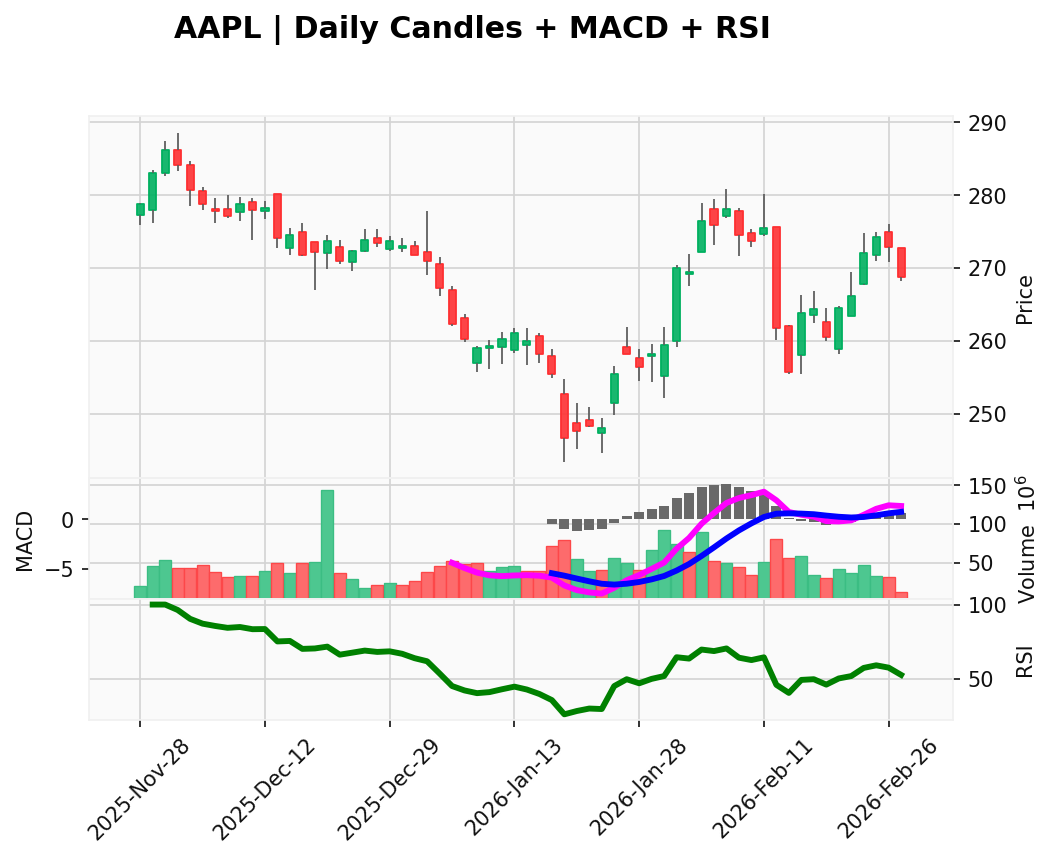

In [7]:
# Display chart image
from IPython.display import Image, display

display(Image(filename=result.image_path))


## Fundamental Analysis Agent - Ingestion

This cell ingests a company PDF into pgvector using Azure Document Intelligence.


In [10]:
root / "ingested_documents" / f"{filename}.md",

(WindowsPath('c:/Users/rushi/OneDrive - ImmersiLearn Education Services LLP/Projects/LLM Projects/market-analyst-agent/ingested_documents/apple-10k-report.md'),)

In [11]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import ingest_pdf_to_pgvector
# filename = "VBL-AR-2024"
# pdf_path = root / "documents" / f"{filename}.pdf"


filename = "apple-10k-report"
pdf_path = root / "documents" / f"{filename}.pdf"


result = ingest_pdf_to_pgvector(
    pdf_path=pdf_path,
    company="APPLE",
    year="2025",
    markdown_output_path=root / "apple" / f"{filename}.md",
)
result


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\.venv\Lib\site-packages\langchain_community\vectorstores\pgvector.py:490: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  store = cls(


IngestionResult(company='APPLE', source_path='c:\\Users\\rushi\\OneDrive - ImmersiLearn Education Services LLP\\Projects\\LLM Projects\\market-analyst-agent\\documents\\apple-10k-report.pdf', chunks_stored=147, collection_name='fundamental_docs', markdown_path='c:\\Users\\rushi\\OneDrive - ImmersiLearn Education Services LLP\\Projects\\LLM Projects\\market-analyst-agent\\apple\\apple-10k-report.md')

## Fundamental Analysis Agent - Load Markdown (No PDF)

Use this if you already have a markdown file and only want to push it into pgvector.


In [ ]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.services.document_ingestion import split_markdown_into_chunks, store_chunks_pgvector, _attach_metadata

# Point to an existing markdown file produced by Azure Document Intelligence
markdown_path = root / "apple" / f"{filename}.md"
markdown_text = markdown_path.read_text(encoding="utf-8")

chunks = split_markdown_into_chunks(markdown_text)
enriched = _attach_metadata(
    chunks,
    company="APPLE",
    doc_type="annual_report",
    year="2025",
    source_path=str(markdown_path),
)

store_chunks_pgvector(
    enriched,
    collection_name="fundamental_docs",
    connection_string=None,
)

print(f"Stored {len(enriched)} chunks from markdown.")


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\.venv\Lib\site-packages\langchain_community\vectorstores\pgvector.py:490: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  store = cls(


Stored 1069 chunks from markdown.


## Fundamental Analysis Agent - Run

Run the agentic RAG over the ingested company data.


In [8]:
import sys
from pathlib import Path

root = Path.cwd().parent if (Path.cwd() / "backend").exists() is False else Path.cwd()
sys.path.append(str(root / "backend"))

from app.agents.fundamental.fundamental_agent import analyze_fundamentals

# General fundamentals summary
general = analyze_fundamentals(
    company="APPLE",
    mode="general",
)
general.answer


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  return PGVector(
c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been ch

Company Retriever Tool Invoked with query: Apple balance sheet summary total assets total liabilities total shareholders' equity cash and cash equivalents marketable securities debt latest fiscal year APPLE
Company Retriever Tool Invoked with query: Apple income statement net sales revenue gross margin operating income net income EPS latest fiscal year APPLE
Company Retriever Tool Invoked with query: Apple cash flow statement net cash provided by operating activities capital expenditures free cash flow share repurchases dividends latest fiscal year APPLE
Retrieved 8 documents for query: Apple income statement net sales revenue gross margin operating income net income EPS latest fiscal year
Retrieved 8 documents for query: Apple balance sheet summary total assets total liabilities total shareholders' equity cash and cash equivalents marketable securities debt latest fiscal year
Retrieved 8 documents for query: Apple cash flow statement net cash provided by operating activities capital e

'## Balance Sheet Summary (FY ended Sep 27, 2025)\n- **Total assets:** **$359.2B** (vs. $365.0B in 2024).\n- **Liquidity:** **Cash & cash equivalents $35.9B**; **marketable securities $96.5B** (current $18.8B + non-current $77.7B). Total cash + marketable securities **$132.4B**.\n- **Capital structure:** **Total liabilities $285.5B**; **shareholders’ equity $73.7B**.\n- **Debt:** **Commercial paper $8.0B**; **term debt $90.7B** (current $12.4B + non-current $78.3B). Management notes **$91.3B** of fixed-rate notes outstanding.\n\n## Income Statement Summary (FY 2025)\n- **Net sales:** **$416.2B** (Products $307.0B; Services $109.2B).\n- **Gross margin:** **$195.2B** (implies ~**46.9%** gross margin).\n- **Operating income:** **$133.1B** (operating margin ~**32.0%**).\n- **Net income:** **$112.0B**; **diluted EPS $7.46** (basic $7.49).\n\n## Cash Flow Summary (FY 2025)\n- **Operating cash flow (CFO):** **$111.5B**.\n- **Capex (PP&E):** **$12.7B** → **FCF (CFO–capex) ~ $98.8B**.\n- **Capi

In [10]:
print(general.answer)

## Balance Sheet Summary (FY ended Sep 27, 2025)
- **Total assets:** **$359.2B** (vs. $365.0B in 2024).
- **Liquidity:** **Cash & cash equivalents $35.9B**; **marketable securities $96.5B** (current $18.8B + non-current $77.7B). Total cash + marketable securities **$132.4B**.
- **Capital structure:** **Total liabilities $285.5B**; **shareholders’ equity $73.7B**.
- **Debt:** **Commercial paper $8.0B**; **term debt $90.7B** (current $12.4B + non-current $78.3B). Management notes **$91.3B** of fixed-rate notes outstanding.

## Income Statement Summary (FY 2025)
- **Net sales:** **$416.2B** (Products $307.0B; Services $109.2B).
- **Gross margin:** **$195.2B** (implies ~**46.9%** gross margin).
- **Operating income:** **$133.1B** (operating margin ~**32.0%**).
- **Net income:** **$112.0B**; **diluted EPS $7.46** (basic $7.49).

## Cash Flow Summary (FY 2025)
- **Operating cash flow (CFO):** **$111.5B**.
- **Capex (PP&E):** **$12.7B** → **FCF (CFO–capex) ~ $98.8B**.
- **Capital returns:** *

In [11]:
# Specific question
qa = analyze_fundamentals(
    company="APPLE",
    question="How has free cash flow changed year over year?",
    mode="qa",
)
qa.answer

c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  return PGVector(


Company Retriever Tool Invoked with query: Apple free cash flow year over year change free cash flow net cash provided by operating activities capital expenditures APPLE
Retrieved 8 documents for query: Apple free cash flow year over year change free cash flow net cash provided by operating activities capital expenditures
{'messages': [HumanMessage(content='Company: APPLE\nQuestion: How has free cash flow changed year over year?\n\nUse the retriever tool to get the most relevant chunks before answering.', additional_kwargs={}, response_metadata={}, id='0bde956b-83ee-4108-818c-3fdeb301b813'), AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 212, 'total_tokens': 250, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'mode

'Using the cash flow statement (in $ millions), and defining **free cash flow (FCF) = cash generated by operating activities − payments for acquisition of property, plant and equipment (capex)**:\n\n- **FY2025:** CFO **111,482** − capex **12,715** = **FCF 98,767**  \n  - **YoY vs FY2024:** **+8,958** (**+10.0%**)\n\n- **FY2024:** CFO **118,254** − capex **9,447** = **FCF 108,807**  \n  - **YoY vs FY2023:** **+7,711** (**+7.6%**)\n\n- **FY2023:** CFO **110,543** − capex **10,959** = **FCF 99,584**\n\nSo, Apple’s FCF **rose from FY2023 to FY2024**, then **declined in FY2025** (driven by lower operating cash flow and higher capex vs FY2024).'

In [12]:
print(qa.answer)

Using the cash flow statement (in $ millions), and defining **free cash flow (FCF) = cash generated by operating activities − payments for acquisition of property, plant and equipment (capex)**:

- **FY2025:** CFO **111,482** − capex **12,715** = **FCF 98,767**  
  - **YoY vs FY2024:** **+8,958** (**+10.0%**)

- **FY2024:** CFO **118,254** − capex **9,447** = **FCF 108,807**  
  - **YoY vs FY2023:** **+7,711** (**+7.6%**)

- **FY2023:** CFO **110,543** − capex **10,959** = **FCF 99,584**

So, Apple’s FCF **rose from FY2023 to FY2024**, then **declined in FY2025** (driven by lower operating cash flow and higher capex vs FY2024).


## Supervisor Agent

Orchestrates technical + fundamental + web news and returns a 6-month synthesis.


In [13]:
import sys
from pathlib import Path

root = Path.cwd()
if str(root / 'backend') not in sys.path:
    sys.path.append(str(root / 'backend'))

from app.agents.supervisor import analyze_market_supervised

supervisor_result = analyze_market_supervised(
    symbol='AAPL',
    company='APPLE',
    fundamental_question='Summarize key strengths, risks, and 6-month fundamental outlook.',
    news_query='Apple latest company news catalysts risks',
    technical_period='3mo',
    technical_interval='1d',
    collection_name='fundamental_docs',
    top_k=8,
)

supervisor_result


c:\Users\rushi\OneDrive - ImmersiLearn Education Services LLP\Projects\LLM Projects\market-analyst-agent\backend\app\agents\fundamental\fundamental_agent.py:45: LangChainPendingDeprecationWarning: Please use JSONB instead of JSON for metadata. This change will allow for more efficient querying that involves filtering based on metadata. Please note that filtering operators have been changed when using JSONB metadata to be prefixed with a $ sign to avoid name collisions with columns. If you're using an existing database, you will need to create a db migration for your metadata column to be JSONB and update your queries to use the new operators. 
  return PGVector(


Company Retriever Tool Invoked with query: Apple Form 10-K strengths competitive advantages ecosystem installed base services segment gross margin APPLE
Company Retriever Tool Invoked with query: Apple Form 10-K risk factors macroeconomic conditions foreign exchange supply chain constraints component shortages geopolitical trade restrictions APPLE
Company Retriever Tool Invoked with query: Apple Form 10-K risk factors regulatory antitrust privacy App Store litigation intellectual property APPLE
Company Retriever Tool Invoked with query: Apple Form 10-K outlook next quarter guidance seasonality demand iPhone Mac iPad wearables services APPLE
Company Retriever Tool Invoked with query: Apple Form 10-K capital return share repurchase dividend liquidity cash and marketable securities APPLE
Company Retriever Tool Invoked with query: Apple Form 10-K concentration of revenue iPhone net sales dependence on third-party manufacturing and suppliers APPLE
Company Retriever Tool Invoked with query: 

SupervisorAnalysisResult(symbol='AAPL', company='APPLE', technical={'symbol': 'AAPL', 'image_path': 'data\\processed\\AAPL_technical.png', 'summary': '- **Trend (price):** Downtrend from late Nov into mid‑Jan (lower highs/lows), then a **sharp rebound** into early Feb. Since mid‑Feb, price looks **range‑bound/choppy** with lower highs vs the early‑Feb peak.\n- **Momentum (MACD):** MACD turned up strongly in late Jan/early Feb (histogram expanded positive), then **momentum faded** as the histogram contracted back toward zero. Latest bars look **near-flat/slightly positive**, suggesting weak bullish momentum but not a strong impulse.\n- **Notable crossovers:** A clear **bullish MACD crossover** occurred in late Jan/early Feb. More recently, MACD and signal are **converging near the zero line**, hinting at a potential **bearish crossover** risk if price weakens.\n- **RSI (14):** RSI bottomed near/under **30 (oversold)** around mid‑Jan, then recovered. It has mostly stayed **below 70** (no

In [14]:
print('6M Rating:', supervisor_result.synthesis.get('investment_rating_6m'))
print('Stance:', supervisor_result.synthesis.get('stance'))
print('\nFinal Thesis:\n')
print(supervisor_result.synthesis.get('final_thesis'))


6M Rating: 7
Stance: Neutral

Final Thesis:

Over the next 6 months, Apple’s high-margin Services growth and large capital returns support a constructive base case, but the stock’s near-term upside is likely capped by regulatory and trade/tariff uncertainty plus AI delivery risk; technically, the shares look range-bound unless they reclaim the ~272–276 area with improving momentum.


## Agent API Calls

Call all agents through FastAPI endpoints (`/agents/*`). Start API first with:
`uvicorn app.main:app --reload --app-dir backend`


In [16]:
import json
from urllib import request, error

API_BASE = 'http://127.0.0.1:8000'

def post_json(path: str, payload: dict):
    body = json.dumps(payload).encode("utf-8")
    req = request.Request(
        url=f"{API_BASE}{path}",
        data=body,
        headers={"Content-Type": "application/json"},
        method="POST",
    )
    with request.urlopen(req) as resp:
        return json.loads(resp.read().decode("utf-8"))

def get_json(path: str):
    with request.urlopen(f"{API_BASE}{path}") as resp:
        return json.loads(resp.read().decode("utf-8"))

try:
    print(get_json("/health"))
except error.URLError as e:
    raise RuntimeError("API is not reachable. Start uvicorn before running these cells.") from e


{'status': 'ok'}


In [17]:
# 1) Web search agent via API
web_api = post_json("/agents/web-search", {"messages": ["Apple latest strategic developments and key risks"]})
web_api


{'result': {'messages': [{'content': 'Apple latest strategic developments and key risks',
    'additional_kwargs': {},
    'response_metadata': {},
    'type': 'human',
    'name': None,
    'id': '1ffc1254-15df-4f5a-a579-2ffb79f26391'},
   {'content': '',
    'additional_kwargs': {'refusal': None},
    'response_metadata': {'token_usage': {'completion_tokens': 356,
      'prompt_tokens': 193,
      'total_tokens': 549,
      'completion_tokens_details': {'accepted_prediction_tokens': 0,
       'audio_tokens': 0,
       'reasoning_tokens': 0,
       'rejected_prediction_tokens': 0},
      'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
     'model_provider': 'openai',
     'model_name': 'gpt-5.2-2025-12-11',
     'system_fingerprint': None,
     'id': 'chatcmpl-DEHwzWNMNWew3H7PhObq6nt7qJXbB',
     'prompt_filter_results': [{'prompt_index': 0,
       'content_filter_results': {'hate': {'filtered': False,
         'severity': 'safe'},
        'jailbreak': {'filtered': 

In [18]:
# 2) Technical agent via API
technical_api = post_json("/agents/technical", {"symbol": "AAPL", "period": "3mo", "interval": "1d"})
technical_api


{'symbol': 'AAPL',
 'image_path': 'data\\processed\\AAPL_technical.png',
 'summary': '- **Trend (price):** Downtrend from late Nov into mid‑Jan (lower highs/lows), followed by a **sharp rebound** into early Feb. Since then, price has been **choppy/range-bound** with lower highs vs the early‑Feb peak (roughly mid‑260s to upper‑270s).\n- **Momentum (MACD):** MACD turned up strongly in late Jan/early Feb (bullish momentum expansion), then **momentum faded** as the histogram rolled over and compressed toward zero. Latest bars show **slight re‑improvement**, but not a strong impulse.\n- **Notable crossovers:** A **bullish MACD crossover** occurred in late Jan/early Feb and remains only **marginally positive/near flat** now—suggesting the up-move is losing strength and needs confirmation.\n- **RSI (overbought/oversold):** RSI dipped near/under **30** around mid‑Jan (oversold) and rebounded to the **50–60** zone. It has **not reached overbought (70)** recently and is now around the **mid‑50s*

In [19]:
# 3) Fundamental agent via API
fundamental_api = post_json(
    "/agents/fundamental",
    {
        "company": "APPLE",
        "mode": "qa",
        "question": "Summarize key strengths, risks, and near-term outlook from the latest report.",
        "collection": "fundamental_docs",
        "top_k": 8
    }
)
fundamental_api


{'mode': 'qa',
 'company': 'APPLE',
 'answer': '## Key strengths (from Apple’s FY2025 Form 10‑K)\n- **Scale + profitability with growing Services mix:** FY2025 net sales were **$416.2B (+6% YoY)** with **Services $109.2B (+14%)** and Products **$307.0B**. Services growth was driven primarily by **advertising, the App Store and cloud services**. Net income was **$112.0B**.  \n- **Strong liquidity and cash generation:** Apple reported **$132.4B** of cash, cash equivalents and marketable securities (9/27/2025) and believes this plus operating cash flow and debt market access is sufficient for needs **over the next 12 months and beyond**.  \n- **Capital return capacity:** In FY2025 Apple **repurchased $89.3B** of stock and paid **$15.4B** in dividends; it announced a **new $100B** repurchase authorization (May 2025) and raised the quarterly dividend to **$0.26**.  \n- **Product breadth and refresh cadence:** The report highlights multiple FY2025 launches across Mac, iPad, iPhone and OS upd

In [20]:
# 4) Supervisor agent via API
supervisor_api = post_json(
    "/agents/supervisor",
    {
        "symbol": "AAPL",
        "company": "APPLE",
        "fundamental_question": "Summarize key strengths, risks, and 6-month fundamental outlook.",
        "news_query": "Apple latest company news catalysts risks",
        "technical_period": "3mo",
        "technical_interval": "1d",
        "collection": "fundamental_docs",
        "top_k": 8
    }
)
supervisor_api


{'symbol': 'AAPL',
 'company': 'APPLE',
 'technical': {'symbol': 'AAPL',
  'image_path': 'data\\processed\\AAPL_technical.png',
  'summary': '- **Trend (price):** Downtrend from late Nov into mid‑Jan (lower highs/lows), then a **sharp rebound** into early Feb. Since mid‑Feb, price looks **range‑bound/choppy** with lower follow‑through after the bounce.\n- **Momentum (MACD):** MACD turned up strongly in late Jan/early Feb (histogram expanded positive), but **momentum has faded**—histogram has been shrinking and is near flat, suggesting the prior upside impulse is losing steam.\n- **Notable crossovers (MACD):** A **bullish MACD crossover** occurred around late Jan/early Feb. More recently, MACD and signal are **converging near the zero line**, hinting at a potential **bearish crossover** if weakness continues.\n- **RSI (14):** RSI bottomed near/under **30 (oversold)** in mid‑Jan, then recovered. Recently RSI is around the **mid‑40s to ~50**, **not overbought** (no 70+), but also not show

In [21]:
print('Supervisor 6M Rating:', supervisor_api['synthesis'].get('investment_rating_6m'))
print('Supervisor Stance:', supervisor_api['synthesis'].get('stance'))
print('\nSupervisor Thesis:\n')
print(supervisor_api['synthesis'].get('final_thesis'))


Supervisor 6M Rating: 6
Supervisor Stance: Neutral

Supervisor Thesis:

For the next 6 months, Apple’s strong earnings power, Services growth, and ongoing buybacks provide a solid floor, but the setup is balanced by fading technical momentum and meaningful headline risks (EU DMA, AI execution timing, and supply/tariff uncertainty). Net: a neutral risk/reward profile unless regulatory outcomes improve and Apple demonstrates clearer AI delivery and supply normalization.
